# CPSC 483 - Introduction to Machine Learning
## Project 4, Spring 2021

##                                                         Group 5 


##  <p>Katelyn Choi &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Malyaj Sirothia&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Manikanta Reddy Nayini</p>                



In [253]:
import sklearn.datasets 
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [254]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#### 1. Load the California Housing dataset as a Pandas DataFrame and examine its features, target values, and description.

In [255]:
housing_data = sklearn.datasets.fetch_california_housing(as_frame=True)
x = pd.DataFrame(housing_data.data)
y = pd.DataFrame(housing_data.target)
data = x
target = y
z = pd.DataFrame(housing_data.frame)

#### 2. Use sklearn.model_selection.train_test_split() to split the features and target values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing. To make sure that your results are reproducible, pass random_state=(2021-3-25).

In [256]:
#-> feature_training x_train
#-> feature_test_sets x_test
# -> target_trainning  y_train
# -> target_test_sets  y_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=(2021-3-25))

In [257]:
print(x_train.shape)

(16512, 8)


#### 3. Recall that when we originally discussed housing prices, we suggested that the price of a house might depend on how many bedrooms it has. Create and fit() an sklearn.linear_model.LinearRegression model using AveBedrms as a predictor of MedHouseVal.

In [258]:
x_train_bedroom = x_train[['AveBedrms']]
y_train_medhouseval = y_train[['MedHouseVal']]

In [259]:
print(x_train_bedroom.shape)

(16512, 1)


In [260]:
X = x_train_bedroom
t = y_train_medhouseval
X = np.reshape(X, (-1, 1))
t = np.reshape(t, (-1, 1))
reg = LinearRegression().fit(X, t)

In [261]:
reg.coef_

array([[-0.13548919]])

In [262]:
reg.intercept_

array([2.21730575])

In [263]:
y_pred = reg.predict(X)

#### Use the predict() method of the model to find the response for each value in the test set, and sklearn.metrics.mean_squared_error(), to find the training and test MSE.


In [264]:
print(y_pred)

[[2.06647815]
 [2.08043224]
 [2.08072829]
 ...
 [2.06885672]
 [2.08053229]
 [2.06890833]]


In [265]:
print(" Avg loss for training set",mean_squared_error(t, y_pred))

 Avg loss for training set 1.3278477256171917


In [266]:
x_test_bedroom = x_test[['AveBedrms']]
y_test_medhouseval = y_test[['MedHouseVal']]
X = x_test_bedroom
t = y_test_medhouseval
X = np.reshape(X, (-1, 1))
t = np.reshape(t, (-1, 1))
y_pred = reg.predict(X)
print("Avg loss for testing data ", mean_squared_error(t, y_pred))

Avg loss for testing data  1.3323730132311569


#### 4. By itself, the MSE doesn’t tell us much. Use the score() method of the model to find the R^2 values for the training and test sets.


In [267]:
X = x_train_bedroom
y = y_train_medhouseval
reg.score(X,y)

0.0028776656256584987

In [268]:
X = x_test_bedroom
y = y_test_medhouseval
reg.score(X,y)

-0.0010086368172135263

#### 5. Let’s take a closer look at the data. Use pandas.plotting.scatter_matrix() to plot each pair of features. Note that you will probably want to use the optional figsize parameter to enlarge the plot. Examine the row (or column) for MedHouseVal to see how it varies with each of the other features.

In [269]:
for x in x_train:
    print(x)

MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude


array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Ho

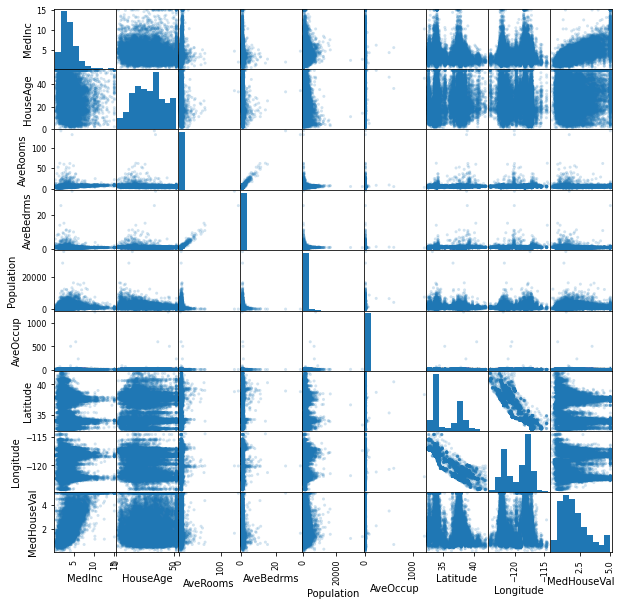

In [270]:
dataset_col = pd.concat([data,target], axis=1)
pd.plotting.scatter_matrix(dataset_col, alpha=0.2,figsize=(10.0,10.0))

#### 6. The graphs are rather crowded because of the size of the dataset. Try the plot again using a sample() of 1%. How does the AveBedrms feature appear to affect MedHouseVal? How does this explain the value of R 2 you found in experiment (4)?


array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='MedHouseVal', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='Ho

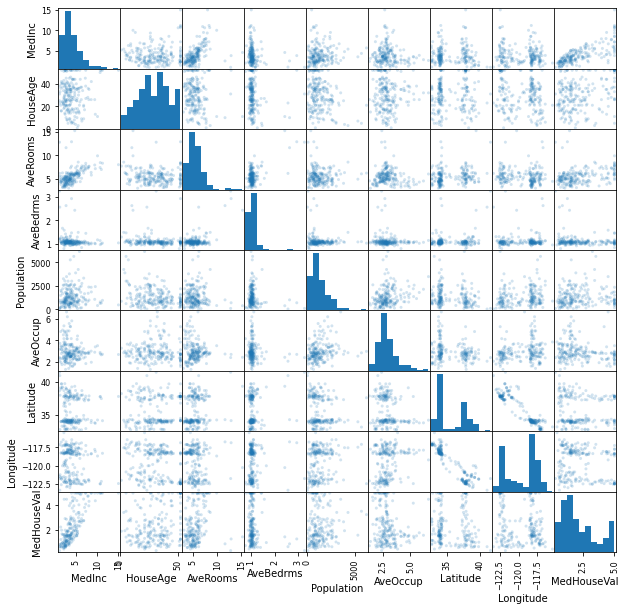

In [271]:
onePercent = dataset_col.sample(frac=0.01)
pd.plotting.scatter_matrix(onePercent, alpha=0.2,figsize=(10.0,10.0))

#### 7. Which features seem to have the strongest linear relationship with MedHouseVal?

> MedInc feature seems to have strong relationship

#### 8. What relationship do you see between MedHouseVal and the Latitude and Longitude features? Look these values up on a map of the state and explain what you see.


>The houses near coastal areas have more MedHouseVal

#### 9. Covariance is difficult to interpret because the various features are on very different scales. While you could standardize the features yourself, the correlation matrix is the covariance matrix of the standardized variables. Based on the correlation matrix, which feature is the strongest predictor of MedHouseVal? Does this match your answer in experiment (7)?


In [272]:
scaler = StandardScaler()

In [273]:
print(scaler.fit(data))

StandardScaler()


In [274]:
print(scaler.mean_)

[ 3.87067100e+00  2.86394864e+01  5.42899974e+00  1.09667515e+00
  1.42547674e+03  3.07065516e+00  3.56318614e+01 -1.19569704e+02]


In [275]:
for d in data:
    print(d)

MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude


In [276]:
df = pd.DataFrame(z,columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','MedHouseVal'])

In [277]:
corrMatrix = df.corr()

In [278]:
print(corrMatrix)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

#### 10. Repeat experiment (4) using the feature you found in the last experiment instead of AveBedrms. How well does this model score?


In [279]:
X = x_train[['MedInc']]
y_train_medhouseval = y_train[['MedHouseVal']]
print(X.shape)
t = y_train_medhouseval
#X = np.reshape(X, (-1, 1))
t = np.reshape(t, (-1, 1))
reg = LinearRegression().fit(X, t)
y_pred = reg.predict(X)
print("Avg loss for training data using MedInc as feature", mean_squared_error(t, y_pred))

(16512, 1)
Avg loss for training data using MedInc as feature 0.7083924846855346


In [280]:
X = x_test[['MedInc']]
y_test_medhouseval = y_test[['MedHouseVal']]
t = y_test_medhouseval
t = np.reshape(t, (-1, 1))
y_pred = reg.predict(X)
print("Avg loss for testing data using MedInc as feature ", mean_squared_error(t, y_pred))

Avg loss for testing data using MedInc as feature  0.67220120164671


#### 11. Repeat experiment (10) using all 8 input features. How do the training and test MSEs for this model compare to that experiment?


In [281]:
x_train = x_train
y_train_medhouseval = y_train[['MedHouseVal']]
X = x_train
print(X.shape)
t = y_train_medhouseval
#X = np.reshape(X, (-1, 1))
t = np.reshape(t, (-1, 1))
reg = LinearRegression().fit(X, t)
y_pred = reg.predict(X)

(16512, 8)


In [282]:
print("Avg loss for training data using all 8 Input Features ", mean_squared_error(t, y_pred))

Avg loss for training data using all 8 Input Features  0.529644445789002


In [283]:
x_test = x_test
y_test_medhouseval = y_test[['MedHouseVal']]
X = x_test
t = y_test_medhouseval
t = np.reshape(t, (-1, 1))
y_pred = reg.predict(X)
print("Avg loss for testing data  using all 8 Input Features", mean_squared_error(t, y_pred))

Avg loss for testing data  using all 8 Input Features 0.5047767239631314


#### 12. Scikit-learn is capable of constructing polynomial features for us using sklearn.preprocessing.PolynomialFeatures. Use the fit_transform() method to create degree-2 polynomial and interaction terms for the entire set of 8 features, then fit a new linear model. Compare the training and test MSE to the previous model. Does adding polynomial terms lead to overfitting?


In [284]:
#ft -> feature_training x_train
#fts -> feature_test_sets x_test
#tt -> target_trainning  y_train
#tts -> target_test_sets  y_test
poly = PolynomialFeatures(2)

polyX = poly.fit_transform(x_train)


poly_Reg = LinearRegression().fit(polyX, y_train)
poly_Pred_Train = poly_Reg.predict(polyX)
poly_Pred_Train_MSE = mean_squared_error(y_train, poly_Pred_Train)
print("Training MSE -> ", poly_Pred_Train_MSE)

poly_Test_X = poly.fit_transform(x_test)
poly_Pred_Test = poly_Reg.predict(poly_Test_X)
poly_Pred_Test_MSE = mean_squared_error(y_test, poly_Pred_Test)
print("Test MSE -> ", poly_Pred_Test_MSE)

Training MSE ->  0.42433222517445984
Test MSE ->  0.6463802930029651


#### 13. Regularization would allow us to construct a model of intermediate complexity (i.e. between linear and quadratic) by penalizing large values for the coefficients. Scikit-learn provides this L2-regularization as sklearn.linear_model.Ridge. The parameter alpha corresponds to 𝜆 as shown in the textbook.


In [285]:
#ft -> feature_training -> x_train
#fts -> feature_test_sets-> x_test
#tt -> target_trainning -> y_train
#tts -> target_test_sets -> y_test
rdg = Ridge(alpha = 1.0, normalize=True)


ridge_Reg = rdg.fit(polyX, y_train)
ridge_Pred_Train = ridge_Reg.predict(polyX)
ridge_Pred_Train_MSE = mean_squared_error(y_train, ridge_Pred_Train)
print("Ridge Training MSE -> ", ridge_Pred_Train_MSE)

poly_Test_X = poly.fit_transform(x_test)
poly_Pred_Test = ridge_Reg.predict(poly_Test_X)
poly_Pred_Test_MSE = mean_squared_error(y_test, poly_Pred_Test)
print("Ridge Test MSE -> ", poly_Pred_Test_MSE)

Ridge Training MSE ->  0.6457457247916452
Ridge Test MSE ->  0.6190711914117152
